# Project: ANZ synthesised transaction Dataset
## by Imene KOLLI

<a id='intro'></a>
## Introduction

> This task is based on a synthesised transaction dataset containing 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.
The dataset is designed to simulate realistic transaction behaviours that are observed in ANZ’s real transaction data, so many of the insights you can gather from the tasks below will be genuine.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
df = pd.read_csv('ANZ-data.csv')
df.head()

,status,card_present_flag,txn_description,balance,date,gender,age,merchant_state,extraction,amount,customer_id,movement,day,month
0,authorized,1.0,POS,35.39,2018-08-01,F,26,QLD,2018-08-01 01:01:15+00:00,16.25,CUS-2487424745,debit,Wednesday,August
1,authorized,0.0,SALES-POS,21.20,2018-08-01,F,26,NSW,2018-08-01 01:13:45+00:00,14.19,CUS-2487424745,debit,Wednesday,August
2,authorized,1.0,POS,5.71,2018-08-01,M,38,NSW,2018-08-01 01:26:15+00:00,6.42,CUS-2142601169,debit,Wednesday,August
3,authorized,1.0,SALES-POS,2117.22,2018-08-01,F,40,QLD,2018-08-01 01:38:45+00:00,40.90,CUS-1614226872,debit,Wednesday,August
4,authorized,1.0,SALES-POS,17.95,2018-08-01,F,26,QLD,2018-08-01 01:51:15+00:00,3.25,CUS-2487424745,debit,Wednesday,August


In [21]:
df.txn_description.value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [4]:
df = df.query('txn_description == "PAY/SALARY"')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883 entries, 50 to 12004
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             883 non-null    object 
 1   card_present_flag  0 non-null      float64
 2   txn_description    883 non-null    object 
 3   balance            883 non-null    float64
 4   date               883 non-null    object 
 5   gender             883 non-null    object 
 6   age                883 non-null    int64  
 7   merchant_state     0 non-null      object 
 8   extraction         883 non-null    object 
 9   amount             883 non-null    float64
 10  customer_id        883 non-null    object 
 11  movement           883 non-null    object 
 12  day                883 non-null    object 
 13  month              883 non-null    object 
dtypes: float64(3), int64(1), object(10)
memory usage: 103.5+ KB


In [5]:
df.drop(['card_present_flag', 'merchant_state'], axis = 1, inplace = True)

In [6]:
df.head()

,status,txn_description,balance,date,gender,age,extraction,amount,customer_id,movement,day,month
50,posted,PAY/SALARY,8342.11,2018-08-01,M,23,2018-08-01 11:00:00+00:00,3903.95,CUS-1462656821,credit,Wednesday,August
61,posted,PAY/SALARY,2040.58,2018-08-01,F,23,2018-08-01 12:00:00+00:00,1626.48,CUS-2500783281,credit,Wednesday,August
64,posted,PAY/SALARY,3158.51,2018-08-01,M,22,2018-08-01 12:00:00+00:00,983.36,CUS-326006476,credit,Wednesday,August
68,posted,PAY/SALARY,2517.66,2018-08-01,M,24,2018-08-01 13:00:00+00:00,1408.08,CUS-1433879684,credit,Wednesday,August
70,posted,PAY/SALARY,2271.79,2018-08-01,F,43,2018-08-01 13:00:00+00:00,1068.04,CUS-4123612273,credit,Wednesday,August


In [7]:
df.describe(include = 'all')

,status,txn_description,balance,date,gender,age,extraction,amount,customer_id,movement,day,month
count,883,883,883.000000,883,883,883.000000,883,883.000000,883,883,883,883
unique,1,1,NaN,65,2,NaN,394,NaN,100,1,5,3
top,posted,PAY/SALARY,NaN,2018-10-15,M,NaN,2018-08-20 13:00:00+00:00,NaN,CUS-2500783281,credit,Monday,October
freq,883,883,NaN,18,464,NaN,7,NaN,14,883,207,313
mean,NaN,NaN,16242.859049,NaN,NaN,32.631937,NaN,1898.728029,NaN,NaN,NaN,NaN
std,NaN,NaN,30953.342656,NaN,NaN,12.276731,NaN,1150.364621,NaN,NaN,NaN,NaN
min,NaN,NaN,735.660000,NaN,NaN,18.000000,NaN,576.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4309.995000,NaN,NaN,22.000000,NaN,1013.670000,NaN,NaN,NaN,NaN
50%,NaN,NaN,7532.540000,NaN,NaN,30.000000,NaN,1626.480000,NaN,NaN,NaN,NaN
75%,NaN,NaN,14370.765000,NaN,NaN,40.000000,NaN,2538.680000,NaN,NaN,NaN,NaN


In [8]:
df.drop(['status', 'movement'], axis = 1, inplace = True)

In [9]:
# this is each customer's 3 months salary 
df.groupby('customer_id')['amount'].sum()

customer_id
CUS-1005756958    12616.11
CUS-1117979751    25050.55
CUS-1140341822    11499.06
CUS-1147642491    22248.07
CUS-1196156254    27326.11
                    ...   
CUS-72755508       8703.84
CUS-809013380     13481.91
CUS-860700529     10851.72
CUS-880898248      8603.88
CUS-883482547     27842.22
Name: amount, Length: 100, dtype: float64

In [10]:
# creating new dataframe for the customers

df2 = df.drop_duplicates(subset = ['customer_id'])[['customer_id','age','gender']].set_index('customer_id')

In [11]:
# customers' average balance in the three months August, September, and October
df2['balance'] = (df.groupby('customer_id')['balance'].sum())/3

In [12]:
# customer's annual salaries
df2['annual_salary'] = (df.groupby('customer_id')['amount'].sum()*4)
df2

,age,gender,balance,annual_salary
customer_id,,,,
CUS-1462656821,23,M,37071.796667,109310.60
CUS-2500783281,23,F,50125.100000,91082.88
CUS-326006476,22,M,38812.810000,55068.16
CUS-1433879684,24,M,9047.223333,39426.24
CUS-4123612273,43,F,24316.623333,59810.24
...,...,...,...,...
CUS-1816693151,40,M,98611.533333,141375.68
CUS-497688347,30,F,4709.860000,39287.20
CUS-423725039,24,F,6925.586667,44550.72


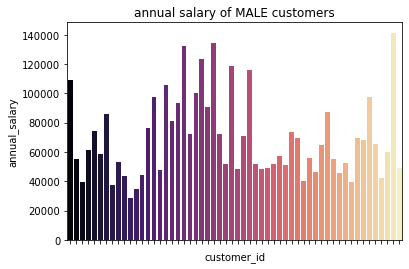

In [13]:
fig, ax = plt.subplots()
sns.barplot(x= df2.query('gender == "M"').index, y="annual_salary", data=df2.query('gender == "M"') , palette = 'magma')

plt.title('annual salary of MALE customers')
labels = [item.get_text() for item in ax.get_xticklabels()]
empty_string_labels = ['']*len(labels)
ax.set_xticklabels(empty_string_labels);

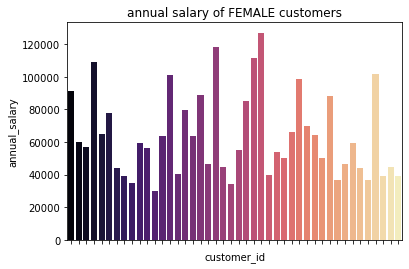

In [14]:
fig, ax = plt.subplots()
sns.barplot(x= df2.query('gender == "F"').index, y="annual_salary", data=df2.query('gender == "F"') , palette = 'magma')

plt.title('annual salary of FEMALE customers')
labels = [item.get_text() for item in ax.get_xticklabels()]
empty_string_labels = ['']*len(labels)
ax.set_xticklabels(empty_string_labels);

it looks like men's salaries are generally higher.

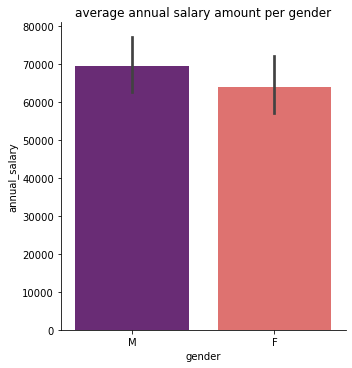

In [15]:
sns.catplot(x="gender", y="annual_salary", kind="bar", data=df2, palette = 'magma')
plt.title('average annual salary amount per gender');

this plot confirms that gender has an impact on salary

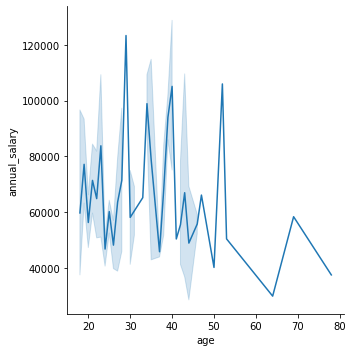

In [16]:
sns.relplot(x='age' , y='annual_salary',kind="line" , data=df2);

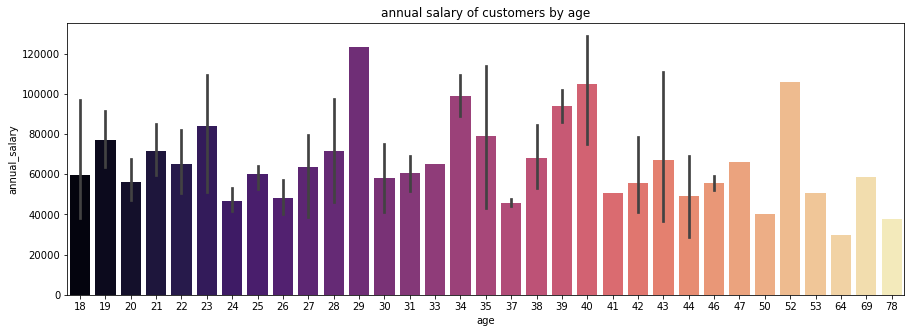

In [17]:
plt.figure(figsize=[15, 5])
sns.barplot(x= 'age', y="annual_salary", data=df2 , palette = 'magma')
plt.title('annual salary of customers by age');

## Regression model

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [27]:
df2 = pd.get_dummies(df2)

In [49]:
X = df2[['age','gender_M', 'balance']]
y = df2['annual_salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
reg = LinearRegression().fit(X_train, y_train)

In [52]:
y_pred = reg.predict(X_test)

In [54]:
np.sqrt(np.mean(y_pred-y_test)**2)

2571.7741929836834

RMSE metric is evaluated to see what are the prediction error in the model. From the evaluation it can be seen there is large prediction error. Therefore ANZ should not use this model to segment the customers

In [37]:
import statsmodels.api as sm;

In [39]:
df2['intercept'] = 1
X = df2[['intercept','age','gender_M', 'balance']]
lm = sm.OLS(y, X)
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          annual_salary   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     2.177
Date:                Sun, 13 Sep 2020   Prob (F-statistic):             0.0957
Time:                        04:33:44   Log-Likelihood:                -1158.3
No. Observations:                 100   AIC:                             2325.
Df Residuals:                      96   BIC:                             2335.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.878e+04   8361.952      8.225      0.000    5.22e+04    8.54e+04
age         -249.2407    241.057     -1.034      0.304    -727.736     229.255
gender_M    4037.2631   5378.731      0.751      0.455   -6639.433    1.47e+04
balance        0.0825      0.036      2.305      0.023       0.011       0.153
==============================================================================
Omnibus:                       11.511   Durbin-Watson:                   1.664
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.563
Skew:                           0.866   Prob(JB):                      0.00187
Kurtosis:                       3.109   Cond. No.                     3.00e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""